In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv(r'C:\Users\Arun JH\Desktop\vaibhavi-proj\spam.csv', sep =',', encoding = 'latin1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


DATA CLEANING

In [3]:
#Dropping the cols 
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace =True)

In [4]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
2808,ham,Oh yeah I forgot. U can only take 2 out shoppi...
4115,ham,What you doing?how are you?
4620,ham,"Received, understood n acted upon!"
1855,ham,K.:)you are the only girl waiting in reception...
2577,ham,Hey whats up? U sleeping all morning?


In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print(df.isnull().sum())     #to find missing values 
print(df.duplicated().sum()) # to find duplicates 

target    0
text      0
dtype: int64
403


In [7]:
#to remove duplicates 
df= df.drop_duplicates(keep = 'first')
print(df.duplicated().sum())
print(df.shape)

0
(5169, 2)


EDA

In [8]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

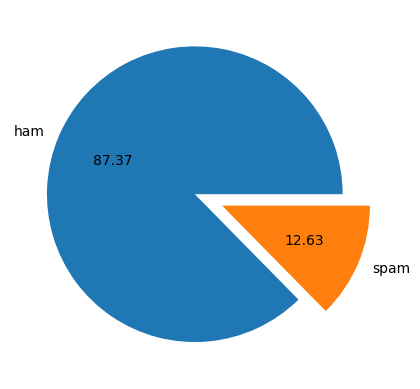

In [9]:
import matplotlib.pyplot as plt 

plt.pie(df['target'].value_counts(), labels = ['ham','spam'],explode =[0 , 0.2],autopct ="%0.2f")
plt.show()


In [10]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Arun
[nltk_data]     JH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df['num_char'] = df['text'].apply(len)
df.head()


,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
# to fetch the number of words
import re

df['num_words'] = df['text'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14


In [13]:
df['num_senten'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)))
df.head()

,target,text,num_char,num_words,num_senten
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,0


<Axes: xlabel='num_char', ylabel='Count'>

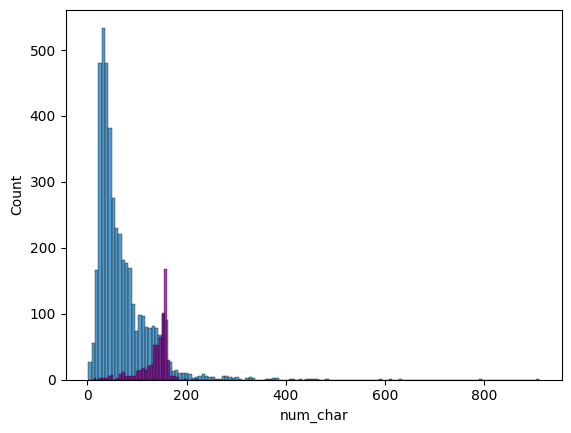

In [14]:
#spotting the difference between the ham and spam messages 
import seaborn as sns 

sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'], color= 'purple')


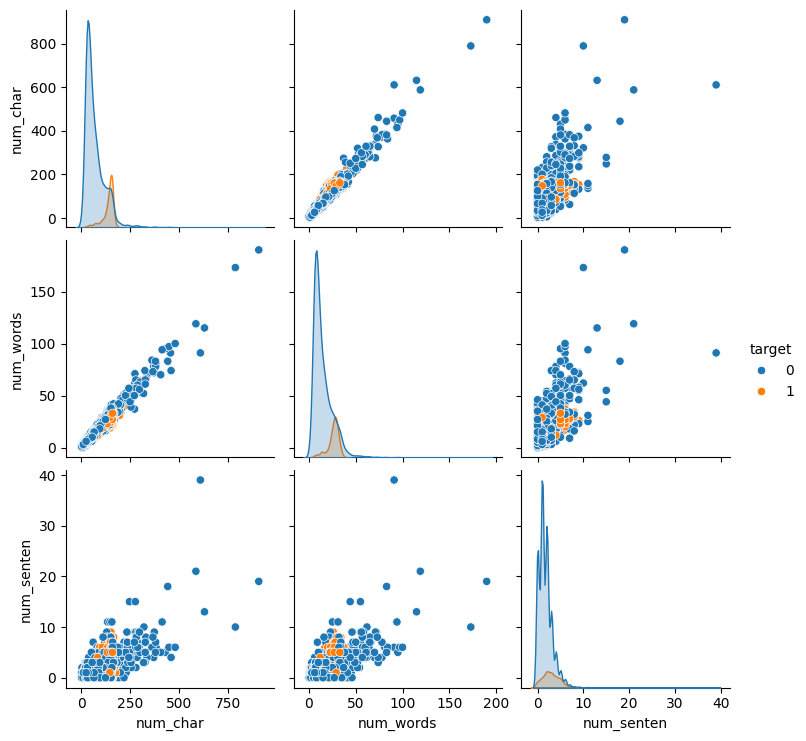

In [15]:
# to find the relationship 
sns.pairplot(df, hue ='target')

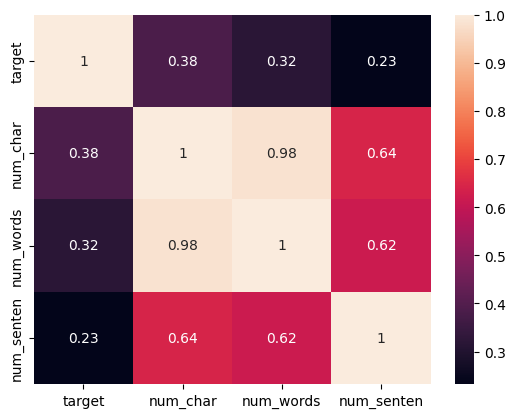

In [16]:
numeric_df = df.select_dtypes(include = 'number')
sns.heatmap(numeric_df.corr(), annot =True)
plt.show()

DATA PREPROCESSING


In [17]:
stopwords_list = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don',
    'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain',
    'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
    "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
    'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
    'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
    "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
])


In [18]:
def transform_text(text):
    text = text.lower()
    text = re.findall(r'\b\w+\b', text)

    y= []
    for i in text: 
        if i.isalnum():    #keep only alpha-numeric tokens 
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords_list:
            y.append(i)
    return y 
        

In [19]:
transform_text('hi how are you???')

['hi']

In [20]:
import spacy

nlp = spacy.load("en_core_web_sm")

def transform_text(text):
    doc = nlp(text.lower())
    tokens = []
    for token in doc:
        if token.is_alpha and not token.is_stop:
            tokens.append(token.lemma_)  # Lemma instead of stem
    return tokens


In [21]:
df['transformed_text']= df['text'].apply(transform_text)
df.head()

,target,text,num_char,num_words,num_senten,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,"[jurong, point, crazy, available, bugis, n, gr..."
1,0,Ok lar... Joking wif u oni...,29,6,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,11,2,"[u, dun, early, hor, u, c]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,0,"[nah, think, go, usf, live]"


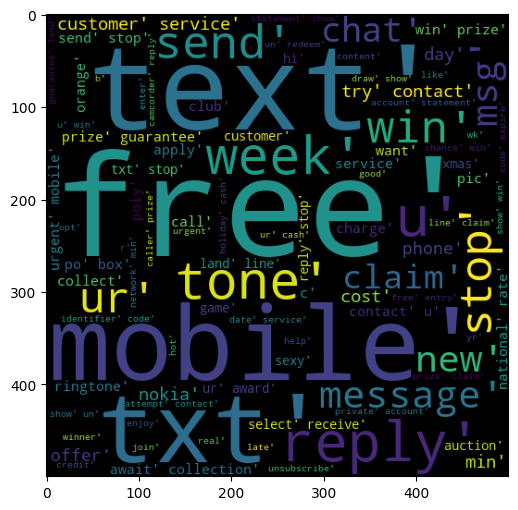

In [22]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height= 500, min_font_size =10,background_color = 'black')

text_data = df[df['target']==1]['transformed_text'].dropna().astype(str)
spam_wc = wc.generate(text_data.str.cat(sep =" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)                        

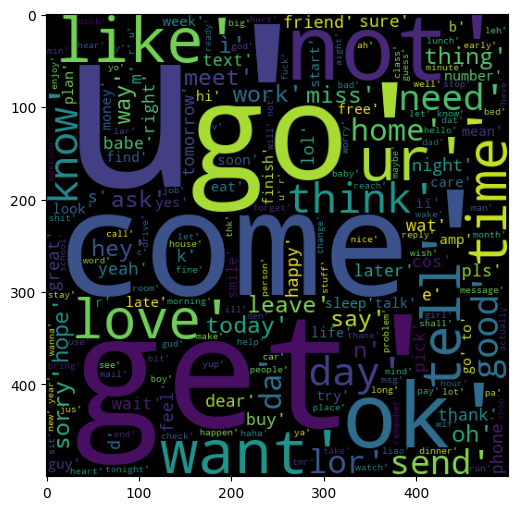

In [23]:
text_data = df[df['target']==0]['transformed_text'].dropna().astype(str)
ham_wc = wc.generate(text_data.str.cat(sep =" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

30 most occurring words in ham and spam 

In [72]:
#df[df['target']==1] ['transformed_text'].tolist()


In [60]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in str(msg).split():
        spam_corpus.append(word)
    
           

In [37]:
len(spam_corpus)

7583

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, "'free',"),
  Text(1, 0, "'txt',"),
  Text(2, 0, "'text',"),
  Text(3, 0, "'mobile',"),
  Text(4, 0, "'ur',"),
  Text(5, 0, "'u',"),
  Text(6, 0, "'claim',"),
  Text(7, 0, "'reply',"),
  Text(8, 0, "'win',"),
  Text(9, 0, "'prize',"),
  Text(10, 0, "'stop',"),
  Text(11, 0, "'send',"),
  Text(12, 0, "'cash',"),
  Text(13, 0, "'tone',"),
  Text(14, 0, "'nokia',"),
  Text(15, 0, "'min',"),
  Text(16, 0, "'new',"),
  Text(17, 0, "'week',"),
  Text(18, 0, "'award',"),
  Text(19, 0, "'phone',"),
  Text(20, 0, "'service',"),
  Text(21, 0, "['urgent',"),
  Text(22, 0, "'contact',"),
  Text(23, 0, "['free',"),
  Text(24, 0, "'chat',"),
  Text(25, 0, "'customer',"),
  Text(26, 0, "'msg',"),
  Text(27, 0, "'draw',"),
  Text(28, 0, "'number',"),
  Text(29, 0, "'guarantee',")])

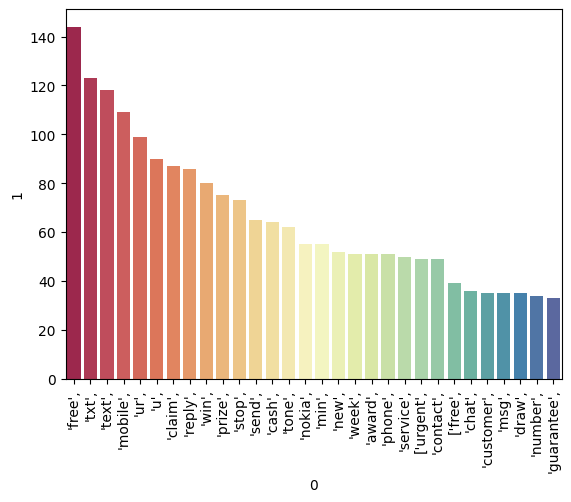

In [52]:
import warnings; warnings.filterwarnings("ignore", category= FutureWarning)
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette= 'Spectral')
plt.xticks(rotation = 'vertical') 

In [59]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in str(msg).split():
        ham_corpus.append(word)
    
           

In [57]:
len(ham_corpus)

29908

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, "'u',"),
  Text(1, 0, "'go',"),
  Text(2, 0, "'get',"),
  Text(3, 0, "'not',"),
  Text(4, 0, "'come',"),
  Text(5, 0, "'like',"),
  Text(6, 0, "'ur',"),
  Text(7, 0, "'know',"),
  Text(8, 0, "'want',"),
  Text(9, 0, "'time',"),
  Text(10, 0, "'good',"),
  Text(11, 0, "'love',"),
  Text(12, 0, "'need',"),
  Text(13, 0, "'day',"),
  Text(14, 0, "['ok',"),
  Text(15, 0, "'tell',"),
  Text(16, 0, "'send',"),
  Text(17, 0, "'think',"),
  Text(18, 0, "'n',"),
  Text(19, 0, "['u',"),
  Text(20, 0, "'home',"),
  Text(21, 0, "'lor',"),
  Text(22, 0, "'ask',"),
  Text(23, 0, "'r',"),
  Text(24, 0, "'say',"),
  Text(25, 0, "'hope',"),
  Text(26, 0, "'da',"),
  Text(27, 0, "'thing',"),
  Text(28, 0, "['hey',"),
  Text(29, 0, "'ì',")])

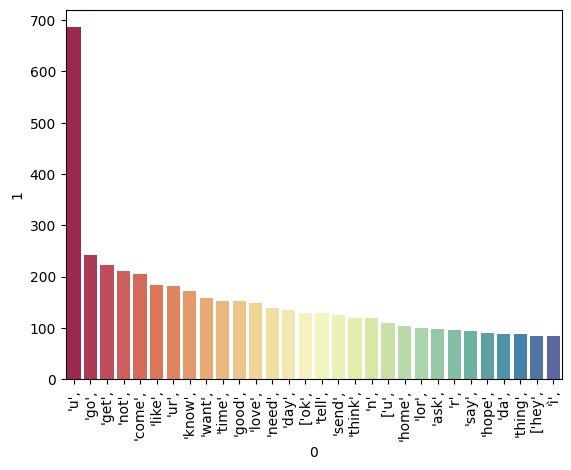

In [58]:
import warnings; warnings.filterwarnings("ignore", category= FutureWarning)
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette= 'Spectral')
plt.xticks(rotation = 'vertical') 

Model Building

In [105]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #bag of words= CountVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
df['transformed_text'] = df['transformed_text'].apply(lambda x:' '.join(x) if isinstance(x,list)else x)
X = tfidf.fit_transform(df['transformed_text']).toarray()
print(X.shape)

(5169, 3000)


In [106]:
y =df['target'].values
print(y)

[0 0 1 ... 0 0 0]


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y,test_size =0.2 ,random_state = 2)

In [108]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb= GaussianNB()
mnb=MultinomialNB()
bnb = BernoulliNB()

In [109]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test, y_pred1))



0.8268858800773694
[[742 154]
 [ 25 113]]
0.4232209737827715


In [110]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test, y_pred2))

0.965183752417795
[[895   1]
 [ 35 103]]
0.9903846153846154


In [111]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test, y_pred3))

0.97678916827853
[[892   4]
 [ 20 118]]
0.9672131147540983


After checking with CountVectorizer and TfidfVectorizer 

tfidf- mnb has perfect precision score :)


In [86]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [112]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [113]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [114]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [115]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9700193423597679
Precision -  0.9495798319327731
For  KN
Accuracy -  0.9129593810444874
Precision -  1.0
For  NB
Accuracy -  0.965183752417795
Precision -  0.9903846153846154
For  DT
Accuracy -  0.9235976789168279
Precision -  0.8314606741573034
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9333333333333333
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9655172413793104
For  AdaBoost
Accuracy -  0.9003868471953579
Precision -  0.9069767441860465
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.88
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9508196721311475
For  GBDT
Accuracy -  0.9448742746615088
Precision -  0.9550561797752809
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [116]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
print(performance_df)

   Algorithm  Accuracy  Precision
1         KN  0.912959   1.000000
2         NB  0.965184   0.990385
5         RF  0.970986   0.965517
9       GBDT  0.944874   0.955056
8        ETC  0.972921   0.950820
0        SVC  0.970019   0.949580
10       xgb  0.967118   0.948276
4         LR  0.954545   0.933333
6   AdaBoost  0.900387   0.906977
7        BgC  0.958414   0.880000
3         DT  0.923598   0.831461


In [117]:

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

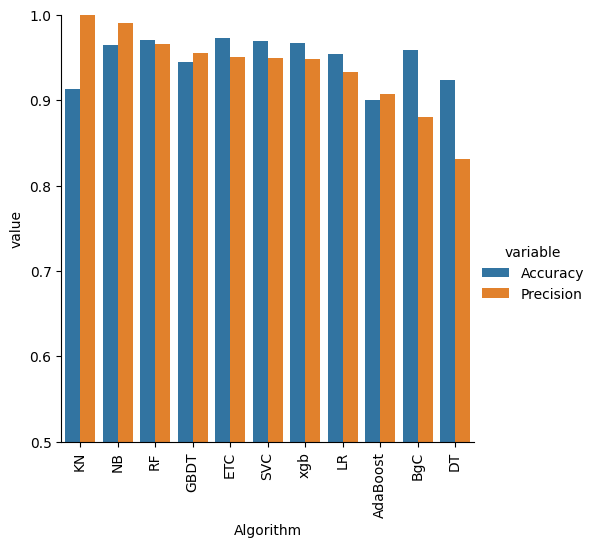

In [118]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

MODEL IMPROVE,
CHANGING THE MAX_FEATURES PARAMETER OF TFIDF



In [119]:

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.912959,1.000000,0.912959,1.000000,0.912959,1.000000,0.912959,1.000000
1,NB,0.965184,0.990385,0.965184,0.990385,0.965184,0.990385,0.965184,0.990385
2,RF,0.970986,0.965517,0.970986,0.965517,0.970986,0.965517,0.970986,0.965517
3,GBDT,0.944874,0.955056,0.944874,0.955056,0.944874,0.955056,0.944874,0.955056
4,ETC,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820
5,SVC,0.970019,0.949580,0.970019,0.949580,0.970019,0.949580,0.970019,0.949580
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,LR,0.954545,0.933333,0.954545,0.933333,0.954545,0.933333,0.954545,0.933333
8,AdaBoost,0.900387,0.906977,0.900387,0.906977,0.900387,0.906977,0.900387,0.906977
9,BgC,0.958414,0.880000,0.958414,0.880000,0.958414,0.880000,0.958414,0.880000


In [121]:
import pickle
pickle.dump(tfidf,open('vectorizer.pk1','wb'))
pickle.dump(mnb,open('model.pk1', 'wb'))